<a href="https://colab.research.google.com/github/ajaynain-eng/Hiring-challanges/blob/main/Amazon%20Business%20Research%20Analyst%20Hiring%20challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Competition/Amazon/16cbaf00248311ed.zip

In [ ]:
import os
import csv
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
print("train_size found: ", len(os.listdir("/content/dataset/train")))
print("test_size found: ", len(os.listdir("/content/dataset/test")))

train_size found:  45593
test_size found:  11399


In [ ]:
# train_size 47880
# train_size found = 45593

# test_size = 9112
# test_size found = 11399

(47880 + 9112) - (45593 + 11399)

0

In [ ]:
for _ in range(2):
    f = open('/content/dataset/train.csv', 'w')
    # create the csv writer
    writer = csv.writer(f)
    train_files = os.listdir("/content/dataset/train")
    for file in train_files:
        with open("/content/dataset/train/" + file, "r") as f:
            row = []
            data = f.read()
            for i in data.strip().split("\n")[:-1]:
                row.append(i.split()[-1])
            # write rows to the csv file
            writer.writerow(row)
    # close the file
    f.close()

In [ ]:
for _ in range(2):
    f = open('/content/dataset/test.csv', 'w')
    # create the csv writer
    writer = csv.writer(f)
    test_files = os.listdir("/content/dataset/test")
    for file in test_files:
        with open("/content/dataset/test/" + file, "r") as f:
            row = []
            data = f.read()
            for i in data.strip().split("\n")[:-1]:
                row.append(i.split()[-1])
            # write rows to the csv file
            writer.writerow(row)
    # close the file
    f.close()

In [ ]:
df_train = pd.read_csv("/content/dataset/train.csv", header=None)
df_train.columns = ["ID", "Delivery_person_ID", "Delivery_person_Age", "Delivery_person_Ratings", "Restaurant_latitude",
                    "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude", "Order_Date", 
                    "Time_Orderd", "Time_Order_picked", "Weather", "Road_traffic_density", "Vehicle_condition", "Type_of_order", 
                    "Type_of_vehicle", "multiple_deliveries", "Festival", "City", "Time_taken"]
print(df_train.shape)
df_train.head()

(45593, 20)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x43f7,COIMBRES20DEL02,24.0,4.9,10.994136,76.963303,11.124136,77.093303,29-03-2022,21:45,21:50,Windy,Jam,2,Snack,scooter,1.0,No,Metropolitian,20.0
1,0x5e38,HYDRES04DEL03,27.0,4.9,17.411028,78.329645,17.501028,78.419645,06-04-2022,21:35,21:40,Sandstorms,Jam,0,Meal,motorcycle,1.0,No,Urban,38.0
2,0x9039,JAPRES18DEL01,37.0,4.3,26.913987,75.752891,26.953987,75.792891,26-03-2022,15:10,15:15,Stormy,Medium,0,Meal,motorcycle,1.0,No,Urban,33.0
3,0xd3cb,KOLRES19DEL02,27.0,4.9,22.549100,88.400467,22.569100,88.420467,13-02-2022,11:50,11:60,Fog,High,1,Snack,motorcycle,1.0,No,Metropolitian,21.0
4,0x9117,HYDRES12DEL03,29.0,4.5,17.429585,78.392621,17.489585,78.452621,17-03-2022,18:25,18:40,Sunny,Medium,1,Snack,motorcycle,0.0,No,Metropolitian,12.0


In [ ]:
df_test = pd.read_csv("/content/dataset/test.csv", header=None)
df_test.columns = ["ID", "Delivery_person_ID", "Delivery_person_Age", "Delivery_person_Ratings", "Restaurant_latitude",
                    "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude", "Order_Date", 
                    "Time_Orderd", "Time_Order_picked", "Weather", "Road_traffic_density", "Vehicle_condition", "Type_of_order", 
                    "Type_of_vehicle", "multiple_deliveries", "Festival", "City"]
print(df_test.shape)
df_test.head()

(11399, 19)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x1227,COIMBRES06DEL02,37.0,4.5,11.021278,76.995017,11.151278,77.125017,18-03-2022,22:10,22:20,Sandstorms,Low,2,Buffet,scooter,1.0,No,Metropolitian
1,0x8089,MUMRES08DEL01,25.0,4.7,19.065838,72.832658,19.075838,72.842658,03-03-2022,11:15,11:20,Windy,High,0,Snack,motorcycle,NaN,Yes,Metropolitian
2,0x8980,MUMRES06DEL01,20.0,4.8,19.055831,72.833984,19.125831,72.903984,31-03-2022,22:30,22:35,Fog,Low,0,Drinks,motorcycle,1.0,No,NaN
3,0x4930,COIMBRES20DEL02,35.0,4.6,10.994136,76.963303,11.074136,77.043303,27-03-2022,22:55,23:10,Stormy,Low,1,Buffet,scooter,0.0,No,Metropolitian
4,0x2f25,INDORES12DEL03,38.0,4.9,22.748060,75.893400,22.778060,75.923400,03-03-2022,22:60,23:10,Cloudy,Low,1,Meal,scooter,0.0,No,Metropolitian


In [ ]:
from math import cos, asin, sqrt, pi
def distance(lat1, lon1, lat2, lon2):
    p = pi/180  
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) 

In [ ]:
dist = []
for i in range(len(df_train)):
    lat1, lon1, lat2, lon2 = df_train.iloc[i][["Restaurant_latitude","Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"]]
    dist.append(distance(lat1, lon1, lat2, lon2))

df_train["distance"] = dist

In [ ]:
dist = []
for i in range(len(df_test)):
    lat1, lon1, lat2, lon2 = df_test.iloc[i][["Restaurant_latitude","Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"]]
    dist.append(distance(lat1, lon1, lat2, lon2))

df_test["distance"] = dist

In [ ]:
df_train["target"] = df_train["Time_taken"]/df_train["distance"]

In [ ]:
df_train["velocity"] = df_train["distance"]/df_train["Time_taken"]

In [ ]:
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance,target,velocity
0,0x43f7,COIMBRES20DEL02,24.0,4.9,10.994136,76.963303,11.124136,77.093303,29-03-2022,21:45,...,2,Snack,scooter,1.0,No,Metropolitian,20.0,20.254010,0.987459,1.012701
1,0x5e38,HYDRES04DEL03,27.0,4.9,17.411028,78.329645,17.501028,78.419645,06-04-2022,21:35,...,0,Meal,motorcycle,1.0,No,Urban,38.0,13.830756,2.747500,0.363967
2,0x9039,JAPRES18DEL01,37.0,4.3,26.913987,75.752891,26.953987,75.792891,26-03-2022,15:10,...,0,Meal,motorcycle,1.0,No,Urban,33.0,5.958760,5.538065,0.180568
3,0xd3cb,KOLRES19DEL02,27.0,4.9,22.549100,88.400467,22.569100,88.420467,13-02-2022,11:50,...,1,Snack,motorcycle,1.0,No,Metropolitian,21.0,3.027136,6.937250,0.144149
4,0x9117,HYDRES12DEL03,29.0,4.5,17.429585,78.392621,17.489585,78.452621,17-03-2022,18:25,...,1,Snack,motorcycle,0.0,No,Metropolitian,12.0,9.220419,1.301459,0.768368


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weather                      44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [ ]:
for col in df_train.columns:
    print(f"{col:<30} {df_train[col].isna().sum():<10} {df_train[col].isna().sum()/455.93}")

ID                             0          0.0
Delivery_person_ID             0          0.0
Delivery_person_Age            1854       4.066413703858048
Delivery_person_Ratings        1908       4.1848529379510016
Restaurant_latitude            0          0.0
Restaurant_longitude           0          0.0
Delivery_location_latitude     0          0.0
Delivery_location_longitude    0          0.0
Order_Date                     0          0.0
Time_Orderd                    1731       3.7966354484241003
Time_Order_picked              0          0.0
Weather                        616        1.3510845963196105
Road_traffic_density           601        1.318184809071568
Vehicle_condition              0          0.0
Type_of_order                  0          0.0
Type_of_vehicle                0          0.0
multiple_deliveries            993        2.177965915820411
Festival                       228        0.5000767661702454
City                           1200       2.631982979843397
Time_taken

In [ ]:
# ["Delivery_person_Age", "Delivery_person_Ratings", "Time_Orderd", "Weather", "Road_traffic_density", "multiple_deliveries", "Festival", "City"]

In [ ]:
# The maximum number of values are for Delivery_person_Ratings column. It is normal as most of people in india avoid to rate any type of service 

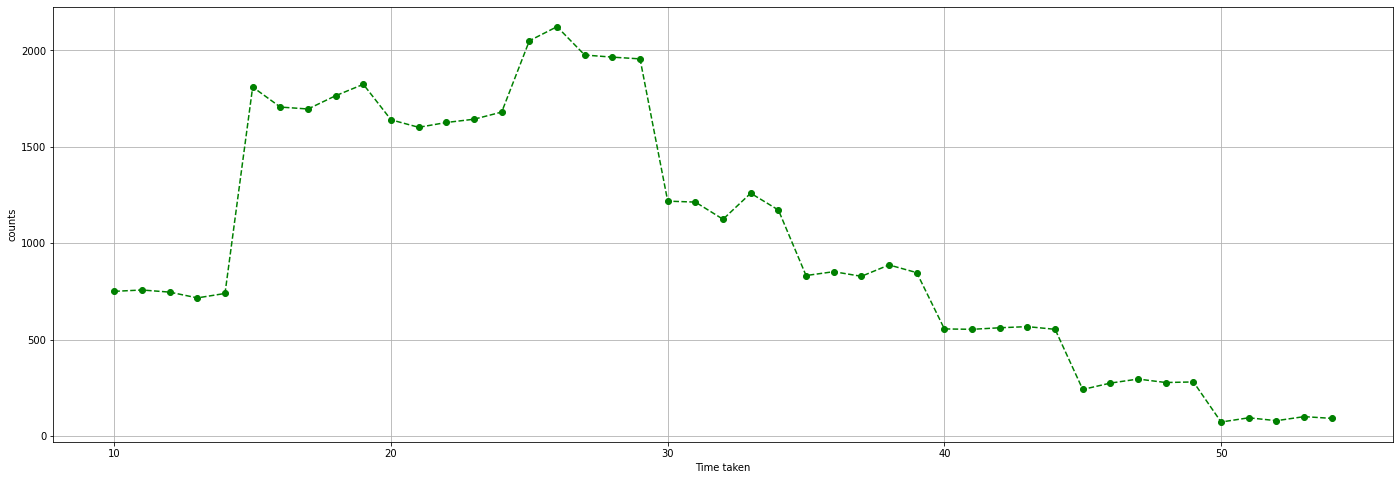

In [ ]:
plt.figure(figsize = (24,8))
plt.plot(df_train["Time_taken"].value_counts().sort_index(), "go--")
plt.xlabel("Time taken")
plt.ylabel("counts")
plt.grid()
plt.show()

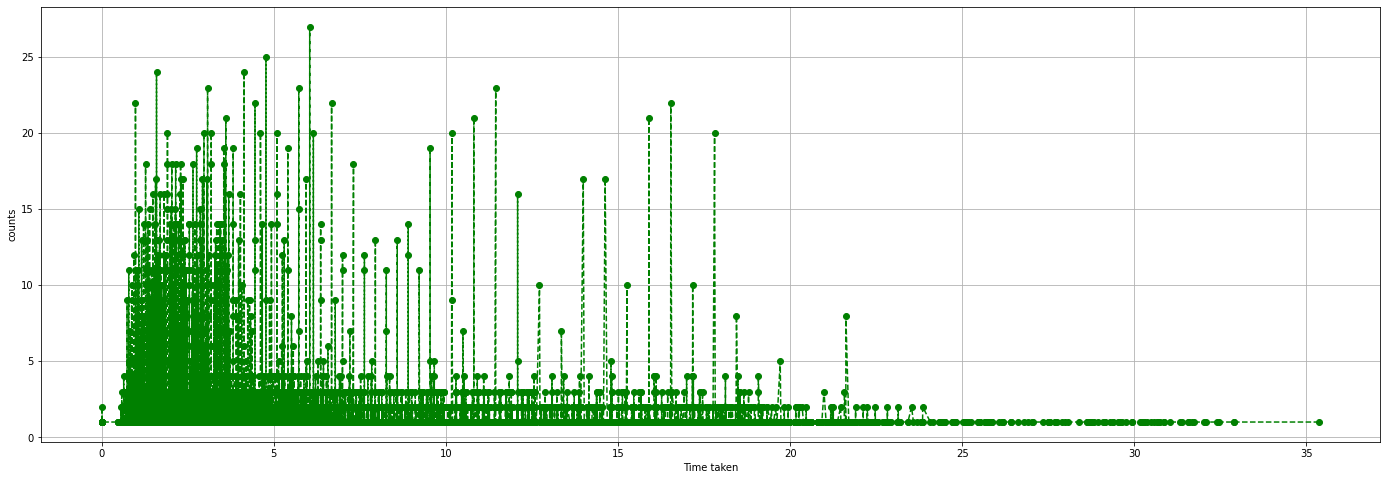

In [ ]:
plt.figure(figsize = (24,8))
# plt.plot(df_train["Time_taken"].value_counts().sort_index(), "go--")
plt.plot(df_train["target"].value_counts().sort_index(), "go--")

plt.xlabel("Time taken")
plt.ylabel("counts")
plt.grid()
plt.show()

In [ ]:
# The data ishighly unbalanced

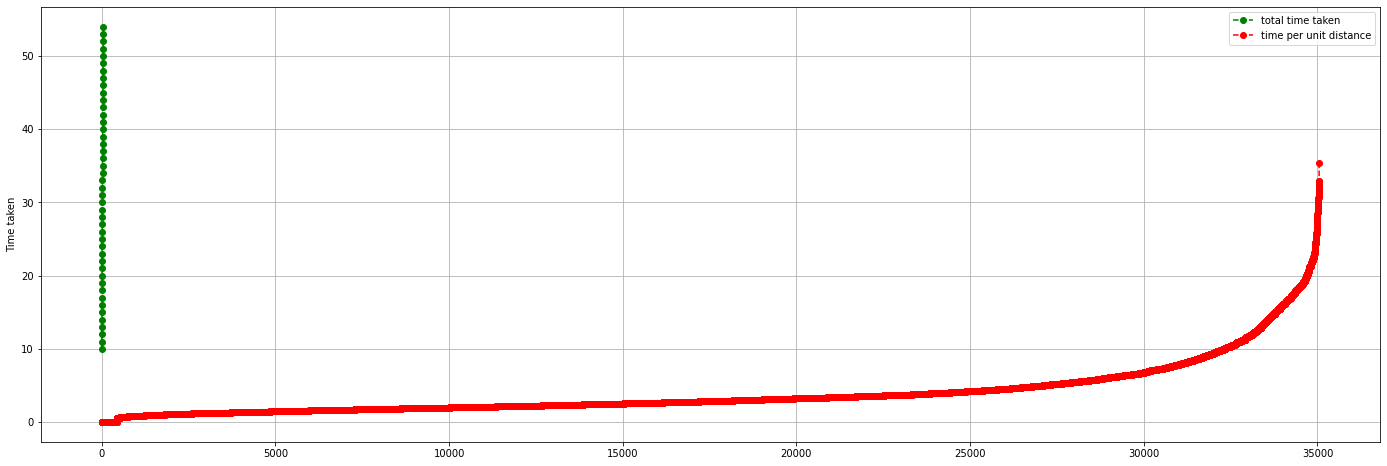

In [ ]:
plt.figure(figsize = (24,8))
plt.plot(df_train["Time_taken"].value_counts().sort_index().index, "go--", label = "total time taken")
plt.plot(df_train["target"].value_counts().sort_index().index, "ro--", label = "time per unit distance")
plt.ylabel("Time taken")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Targets (time taken) are continue values

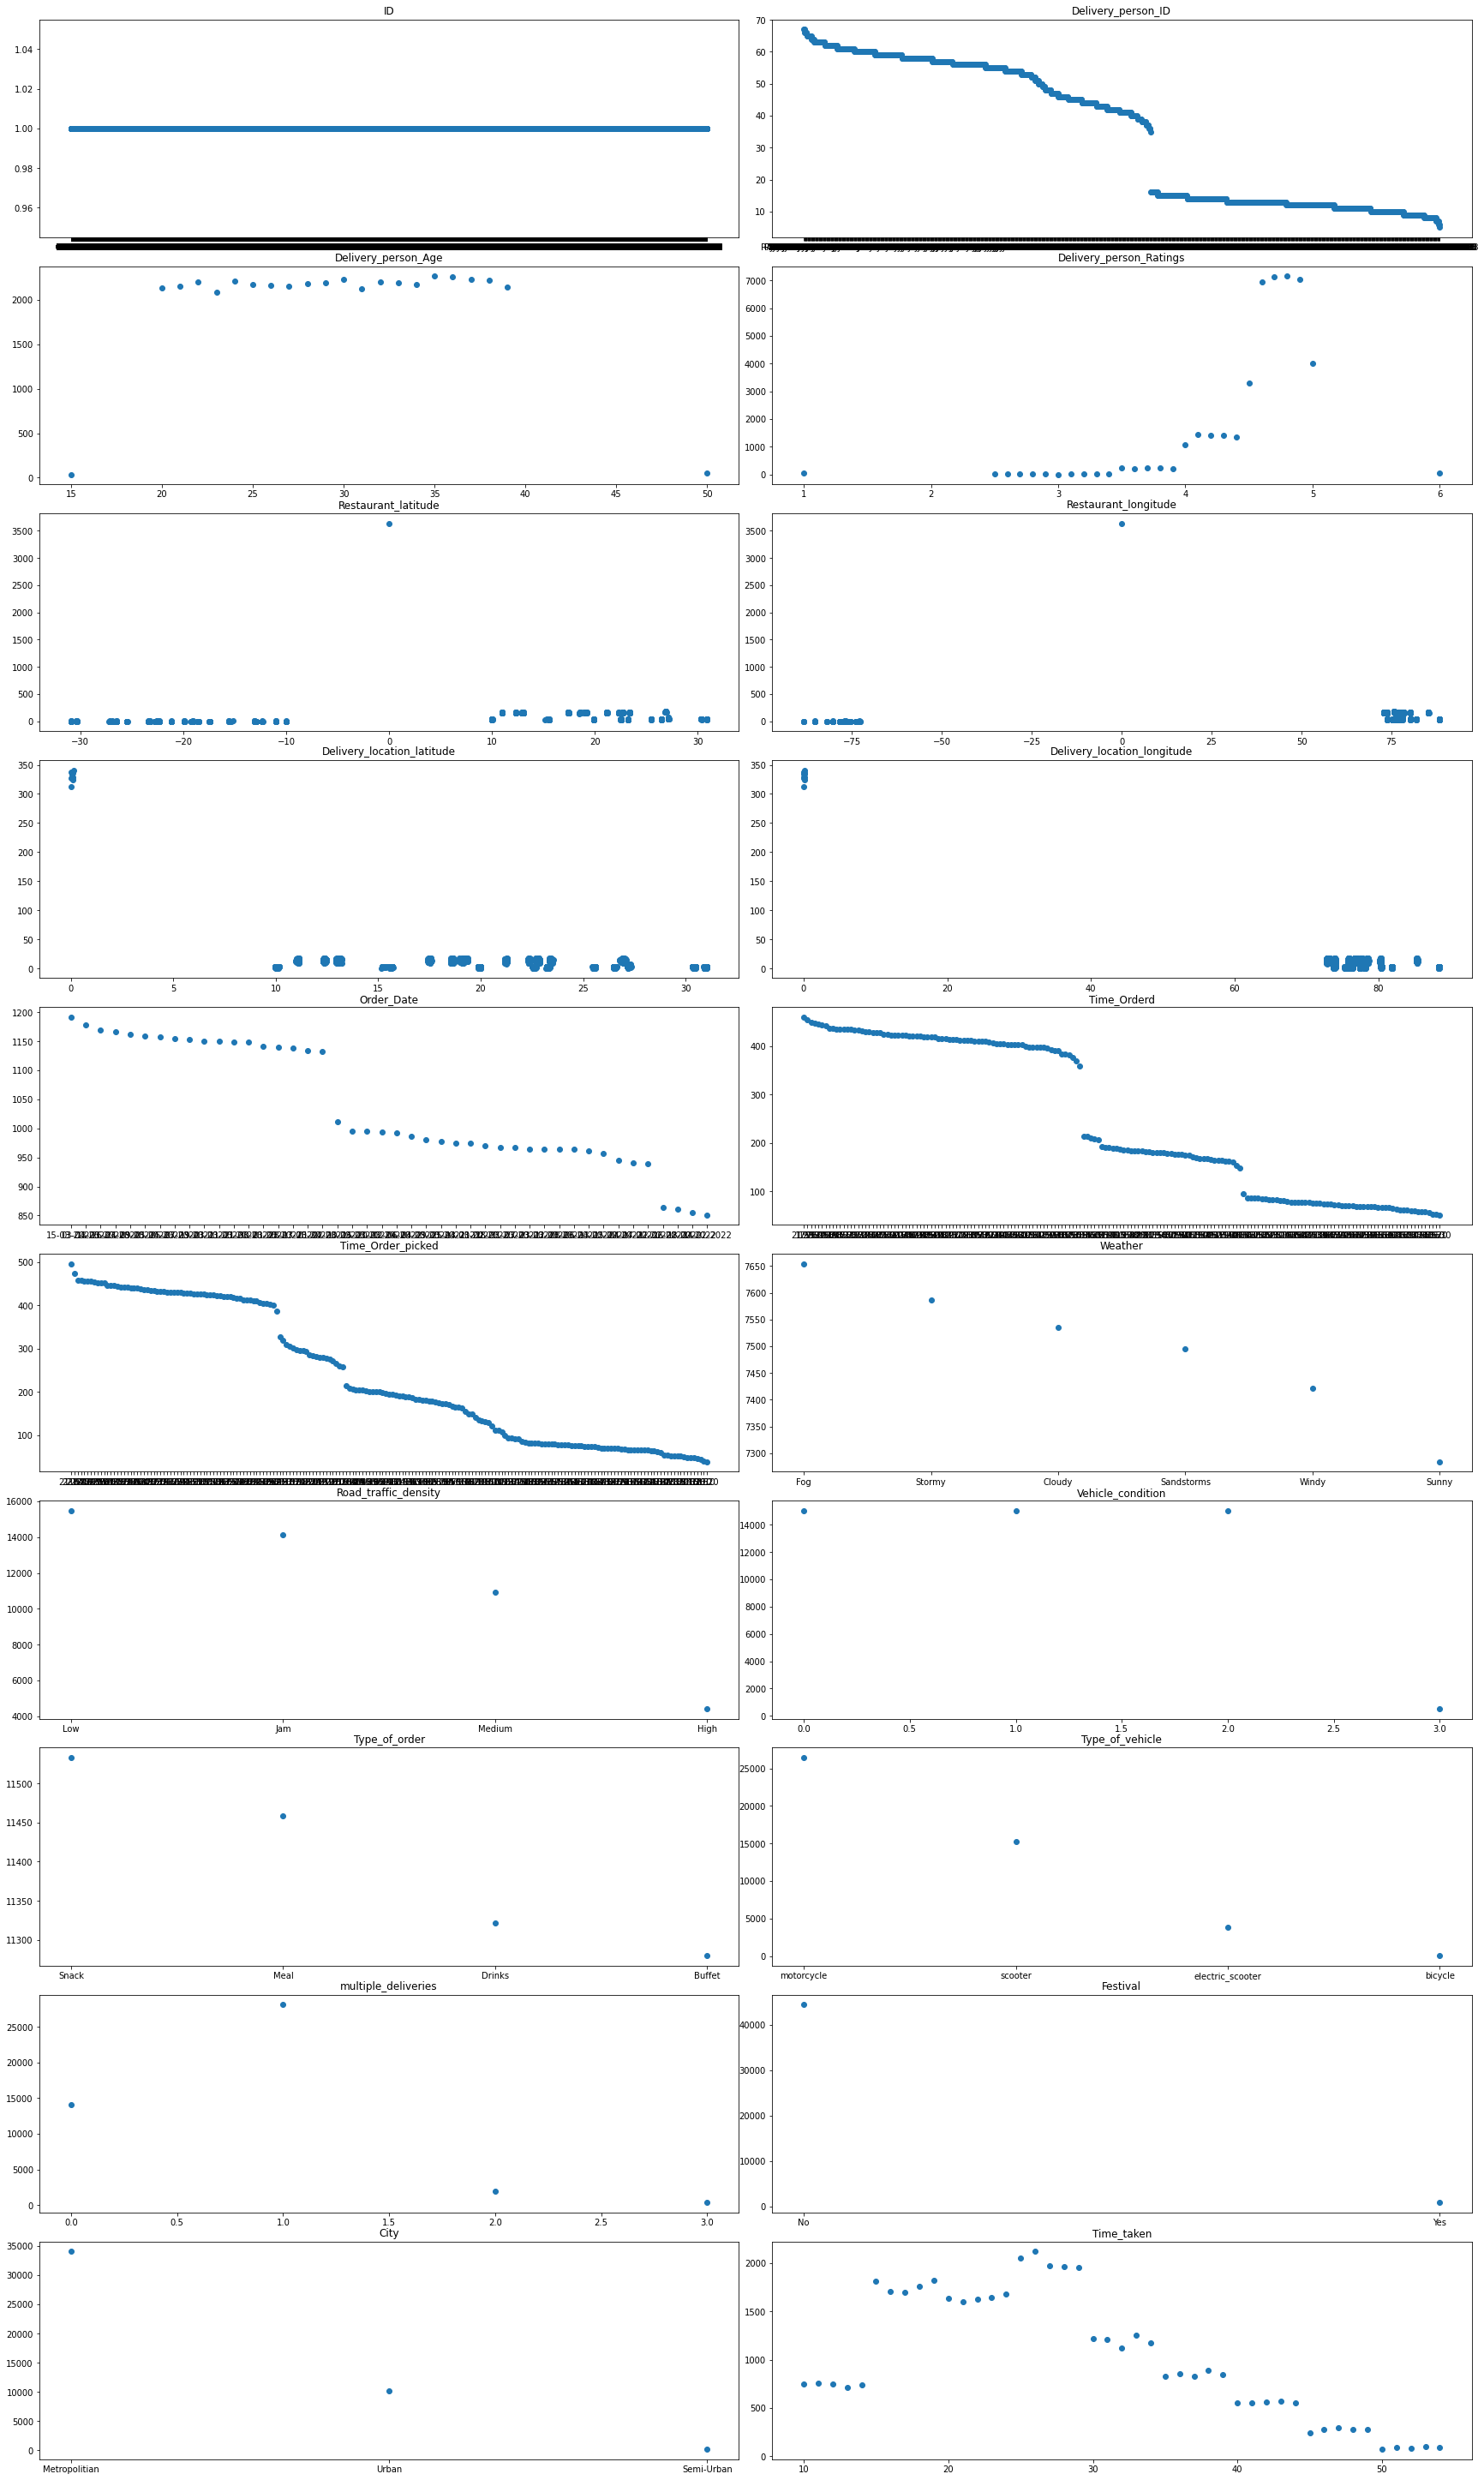

In [ ]:
fig, axe = plt.subplots(nrows = 11, ncols = 2, figsize = (24, 40))
columns = df_train.columns
for i in range(10):
    for j in range(2):
        s = i*2 + j
        axe[i,j].scatter(df_train[columns[s]].value_counts().index, df_train[columns[s]].value_counts().values)
        axe[i,j].set_title(str(columns[s]))

plt.tight_layout(pad = 0, h_pad = 0, w_pad = 0)
plt.show()

<Figure size 2160x2160 with 0 Axes>

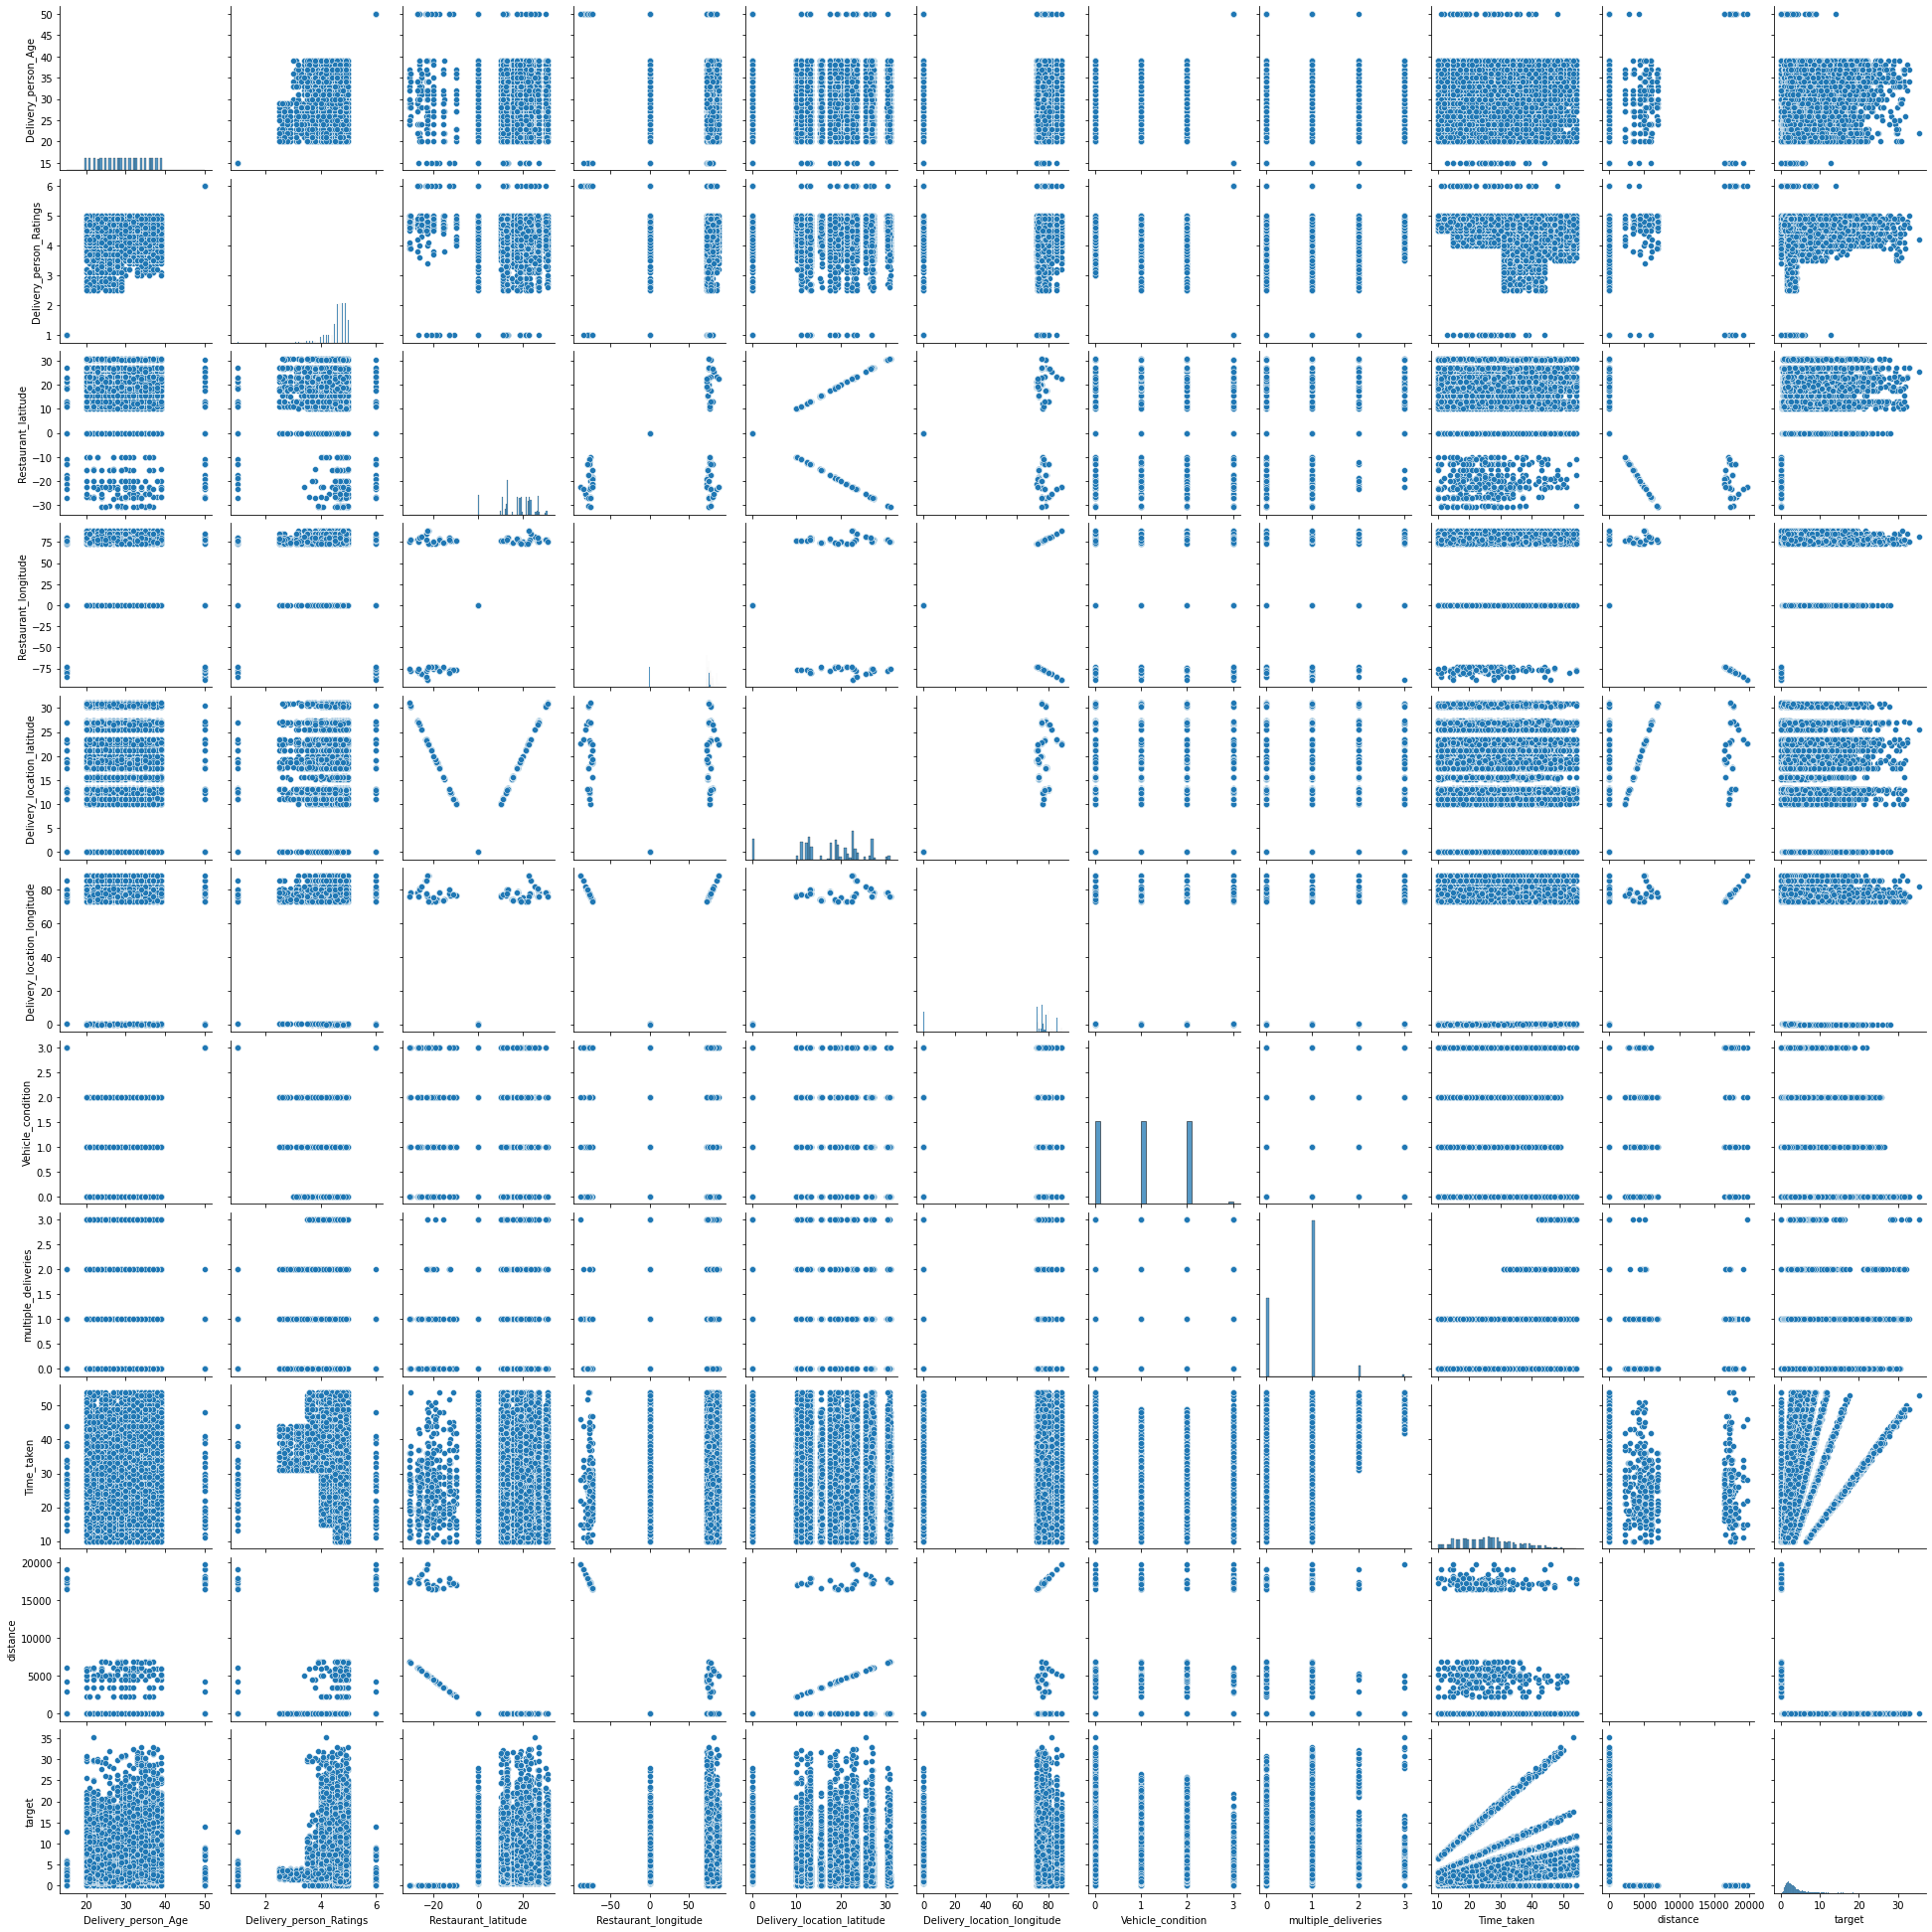

In [ ]:
plt.figure(figsize = (30,30))
sns.pairplot(df_train)

In [ ]:
temp_id = []
max_time = []
min_time = []
mean_time = []
for id, group in df_train.groupby("Delivery_person_ID"):
    temp_id.append(id)
    time = group["Time_taken"]
    max_time.append(time.max())
    min_time.append(time.min())
    mean_time.append(time.mean())

In [ ]:
id_counts = df_train["Delivery_person_ID"].value_counts().values

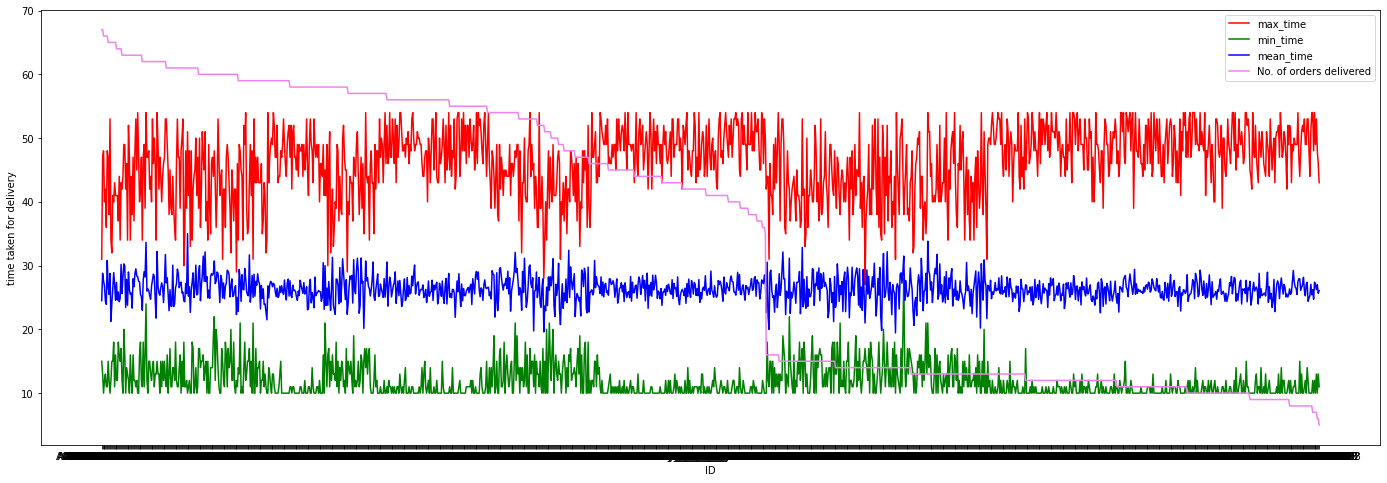

In [ ]:
plt.figure(figsize = (24,8))
plt.plot(temp_id, max_time, color = "red", label = "max_time")
plt.plot(temp_id, min_time, color = "green", label = "min_time")
plt.plot(temp_id, mean_time, color = "blue", label = "mean_time")
plt.plot(temp_id, id_counts, color = "violet", label = "No. of orders delivered")
plt.xlabel("ID")
plt.ylabel("time taken for delivery")
plt.legend()
plt.show()

In [ ]:
temp_id = []
max_time = []
min_time = []
mean_time = []
for id, group in df_train.groupby("Delivery_person_ID"):
    temp_id.append(id)
    time = group["target"]
    max_time.append(time.max())
    min_time.append(time.min())
    mean_time.append(time.mean())

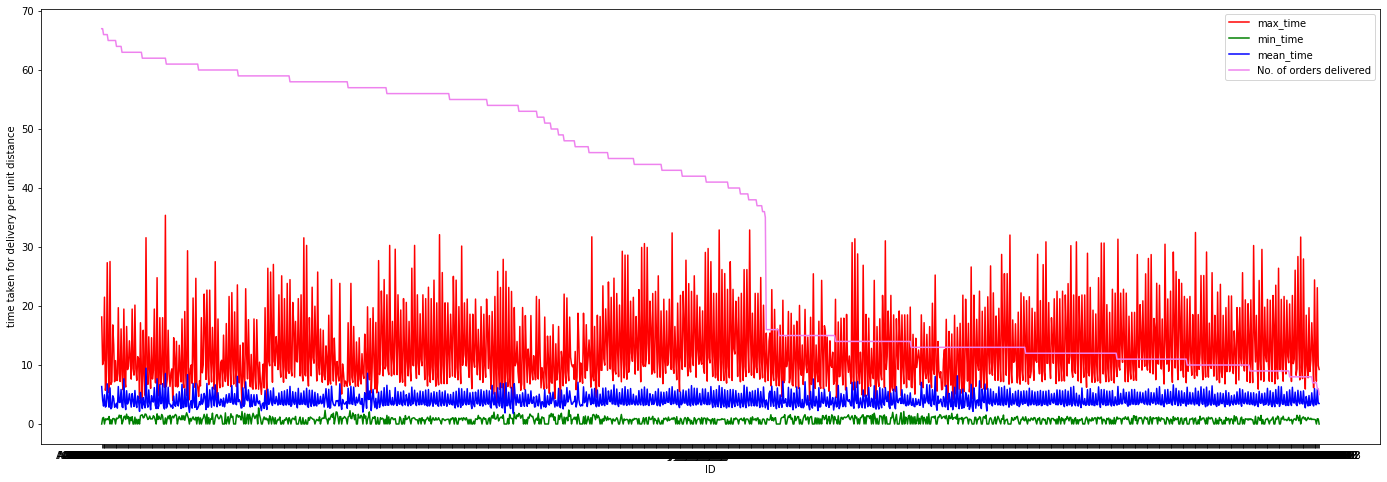

In [ ]:
plt.figure(figsize = (24,8))
plt.plot(temp_id, max_time, color = "red", label = "max_time")
plt.plot(temp_id, min_time, color = "green", label = "min_time")
plt.plot(temp_id, mean_time, color = "blue", label = "mean_time")
plt.plot(temp_id, id_counts, color = "violet", label = "No. of orders delivered")
plt.xlabel("ID")
plt.ylabel("time taken for delivery per unit distance")
plt.legend()
plt.show()

In [ ]:
# There is no relationship between person_id and time taken.

In [ ]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'distance'],
      dtype='object')

In [ ]:
min_rating = []
max_rating = []
for id, group in df_train.groupby("Delivery_person_ID"):
    rating = group["Delivery_person_Ratings"]
    min_rating.append(rating.min())
    max_rating.append(rating.max())

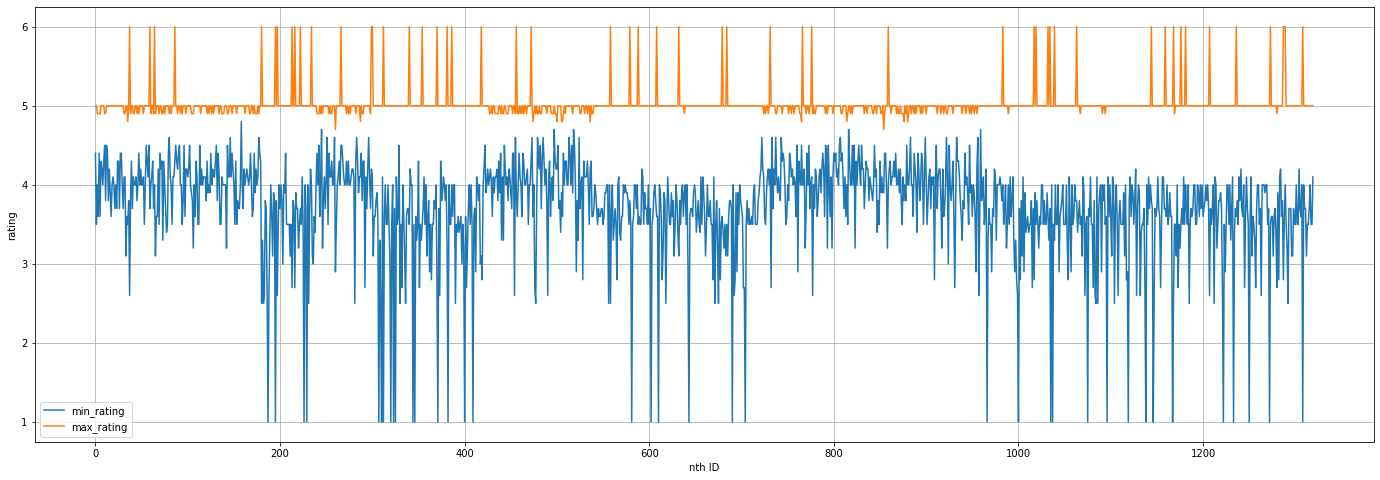

In [ ]:
plt.figure(figsize = (24,8))
plt.plot(min_rating, label = "min_rating")
plt.plot(max_rating, label = "max_rating")
plt.xlabel("nth ID")
plt.ylabel("rating")
plt.legend()
plt.grid()
plt.show()

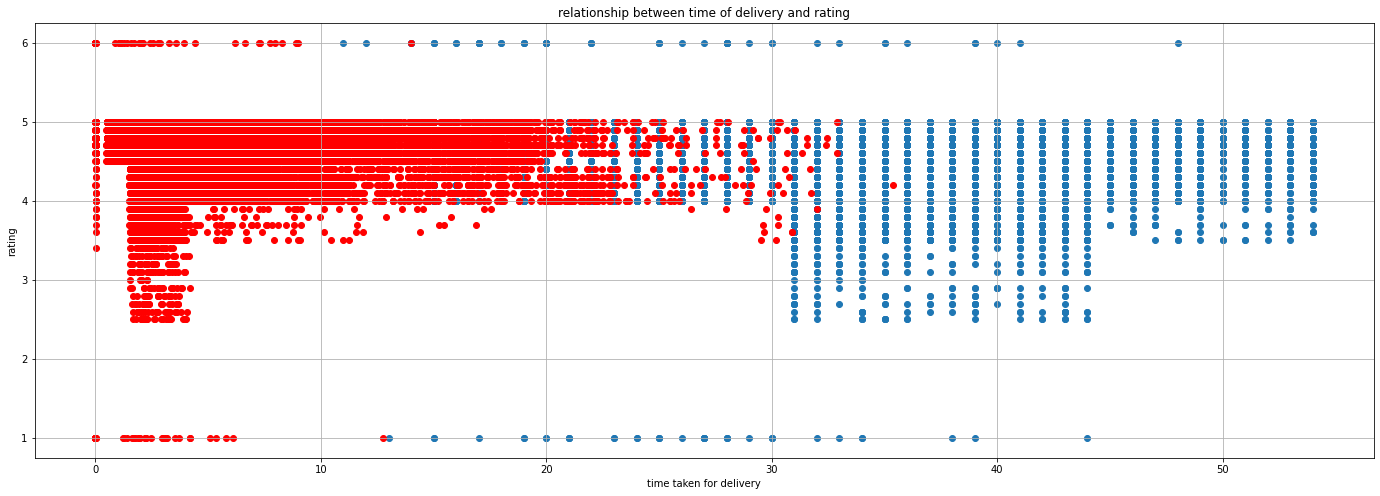

In [ ]:
plt.figure(figsize = (24,8))
time_rating = df_train[["Delivery_person_Ratings", "Time_taken", "target"]].dropna().sort_values(by = "Time_taken")
plt.scatter(time_rating["Time_taken"], time_rating["Delivery_person_Ratings"])
plt.scatter(time_rating["target"], time_rating["Delivery_person_Ratings"], color = "red")
plt.xlabel("time taken for delivery")
plt.ylabel("rating")
plt.title("relationship between time of delivery and rating")
plt.grid()
plt.show()

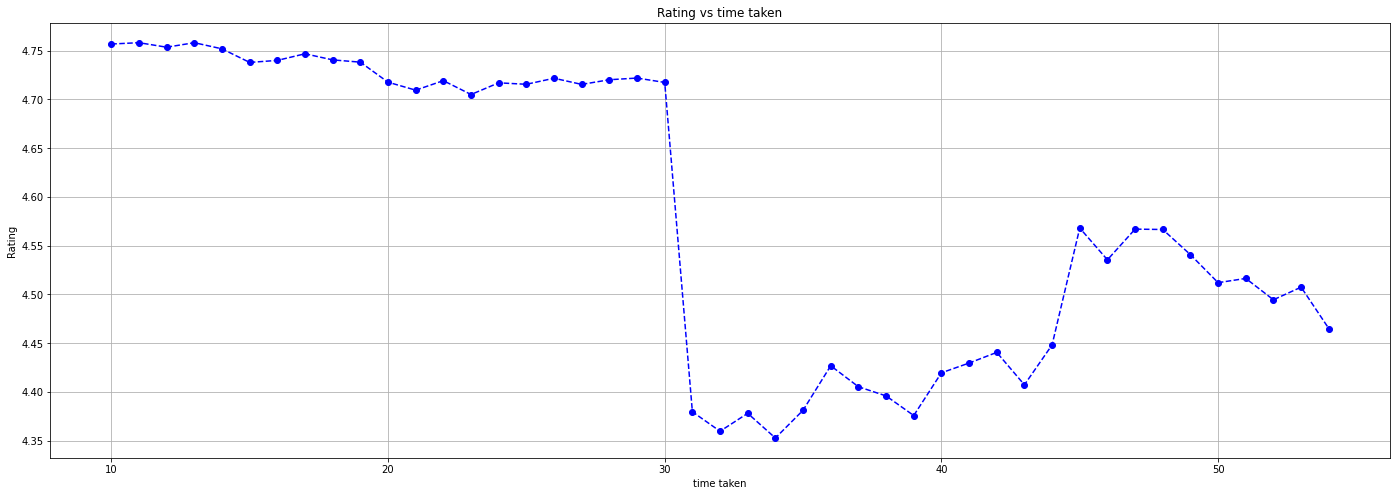

In [ ]:
# time_rating = df_train["Delivery_person_Age"].value_counts().sort_index()
time_rating = df_train.groupby("Time_taken")["Delivery_person_Ratings"].aggregate("mean")
plt.figure(figsize = (24,8))
plt.plot(time_rating.index, time_rating.values, "bo--")
plt.xlabel("time taken")
plt.ylabel("Rating")
plt.title("Rating vs time taken")
plt.grid()
plt.show()

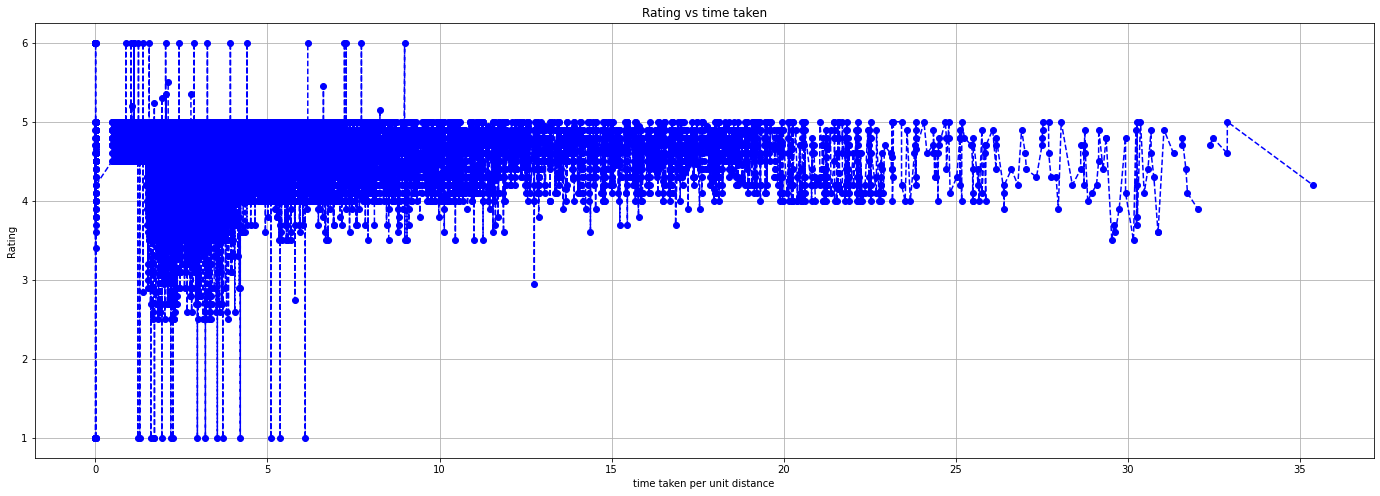

In [ ]:
time_rating = df_train.groupby("target")["Delivery_person_Ratings"].aggregate("mean")
plt.figure(figsize = (24,8))
plt.plot(time_rating.index, time_rating.values, "bo--")
plt.xlabel("time taken per unit distance")
plt.ylabel("Rating")
plt.title("Rating vs time taken")
plt.grid()
plt.show()

In [ ]:
# Rating is not based on time taken for delivery

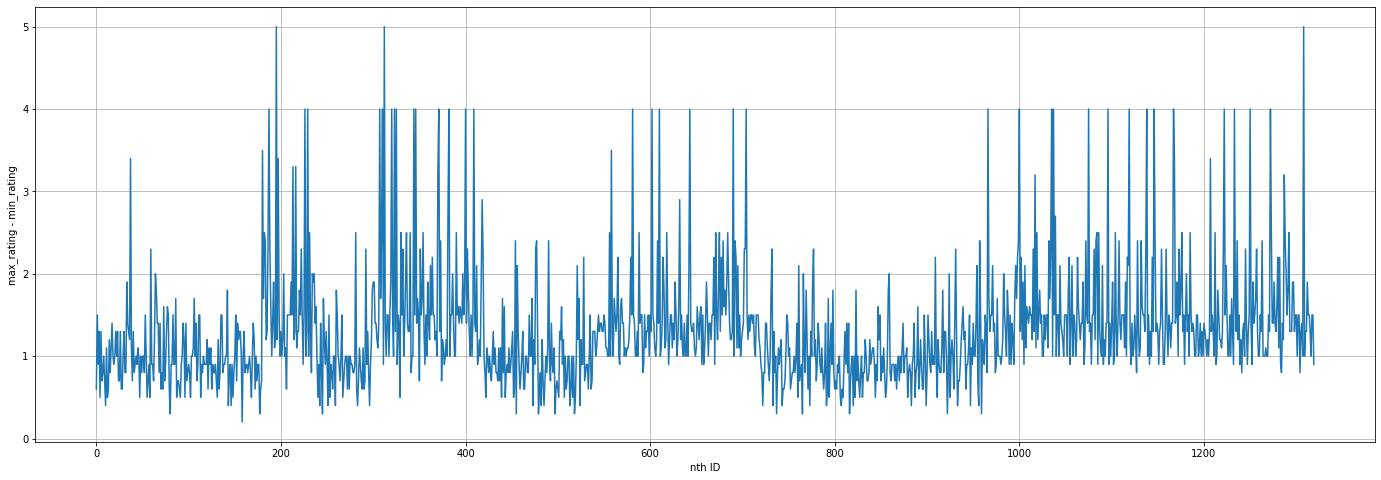

In [ ]:
plt.figure(figsize = (24,8))
plt.plot((np.array(max_rating)-np.array(min_rating)))
plt.xlabel("nth ID")
plt.ylabel("max_rating - min_rating")
plt.grid()
plt.show()

In [ ]:
non_nan_count = []
percent_nan = []
for id, group in df_train.groupby("Delivery_person_ID"):
    rating = group["Delivery_person_Ratings"]
    total = group.shape[0]
    nan_count = rating.isna().sum()
    non_nan_count.append(total-nan_count)
    percent_nan.append(nan_count/total)

In [ ]:
np.min(non_nan_count), np.max(percent_nan)*100

(4, 33.33333333333333)

In [ ]:
# For every Delivery person, there is atleat 4 rating. We can fill the NaN with average rating for the particular Delivery_person_ID

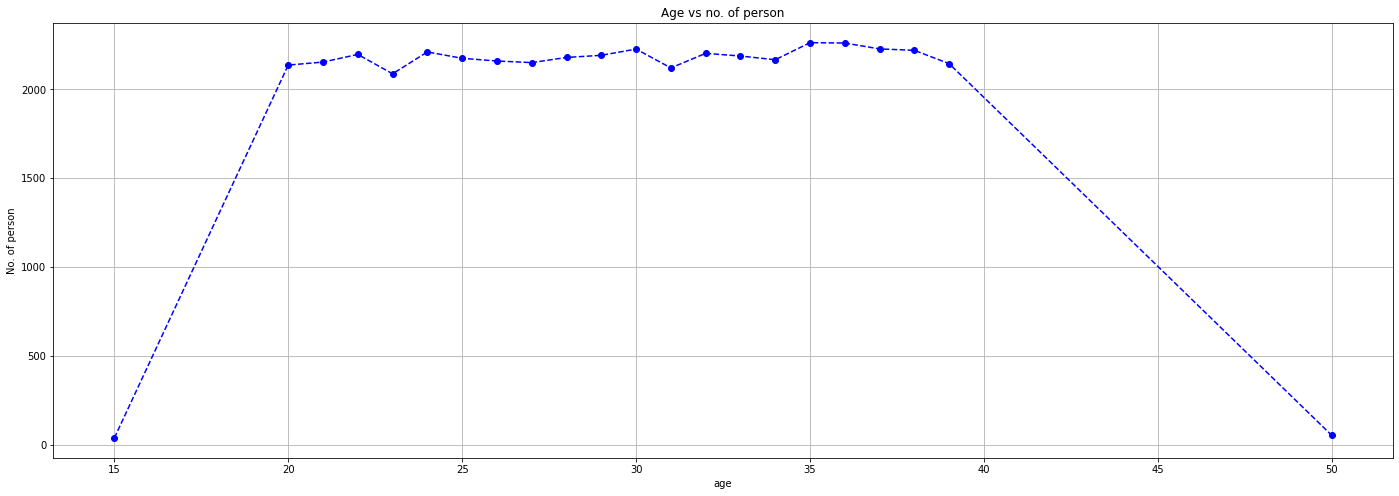

In [ ]:
age_counts = df_train["Delivery_person_Age"].value_counts().sort_index()
plt.figure(figsize = (24,8))
plt.plot(age_counts.index, age_counts.values, "bo--")
plt.xlabel("age")
plt.ylabel("No. of person")
plt.title("Age vs no. of person")
plt.grid()
plt.show()

In [ ]:
# Most of people wroking are in from the age group of (20,40)
# age_15 = 38 person
# age_50 = 53 person

In [ ]:
# age = (15, 50) can be taken as outlier and can be removed

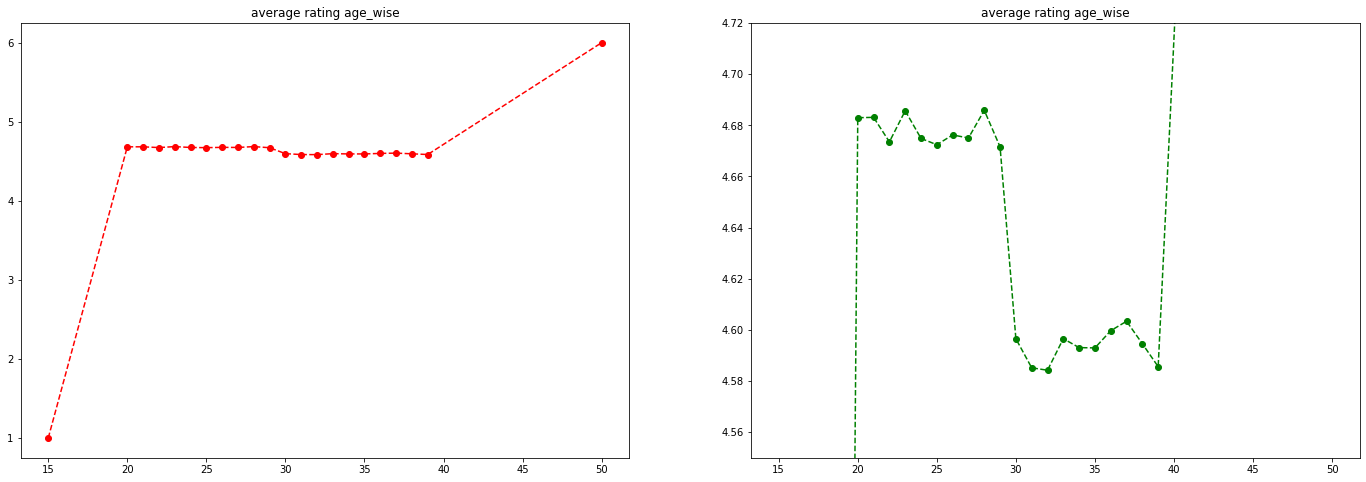

In [ ]:
age_rating = df_train.groupby("Delivery_person_Age")["Delivery_person_Ratings"].aggregate("mean")
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (24,8))
ax1.plot(age_rating.index, age_rating.values, "ro--")
ax1.set_title("average rating age_wise")


ax2.plot(age_rating.index, age_rating.values, "go--")
plt.ylim([4.55,4.72])
ax2.set_title("average rating age_wise")
plt.show()

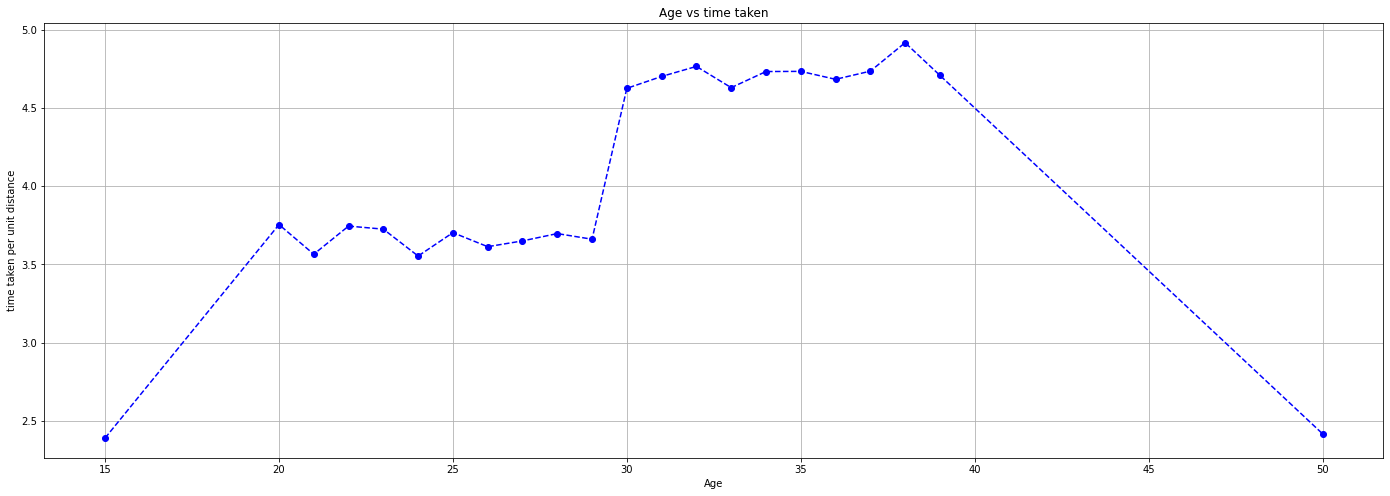

In [ ]:
time_rating = df_train.groupby("Delivery_person_Age")["target"].aggregate("mean")
plt.figure(figsize = (24,8))
plt.plot(time_rating.index, time_rating.values, "bo--")
plt.xlabel("Age")
plt.ylabel("time taken per unit distance")
plt.title("Age vs time taken")
plt.grid()
plt.show()

In [ ]:
# If we don't consider the outliers(age<20, age>39); it can be observed that young delivery person are taking little bit less time to cover unit distance to make a delivery.

In [ ]:
['Fog', 'Stormy', 'Cloudy', 'Sandstorms', 'Windy', 'Sunny']

In [ ]:
temp = df_train["Weather"].map({'Fog' : 0, 'Stormy' : 1, 'Cloudy' : 2, 'Sandstorms' : 3, 'Windy' : 4, 'Sunny' : 5})
temp

0        1.0
1        5.0
2        3.0
3        1.0
4        0.0
        ... 
45588    4.0
45589    2.0
45590    3.0
45591    5.0
45592    2.0
Name: Weather, Length: 45593, dtype: float64

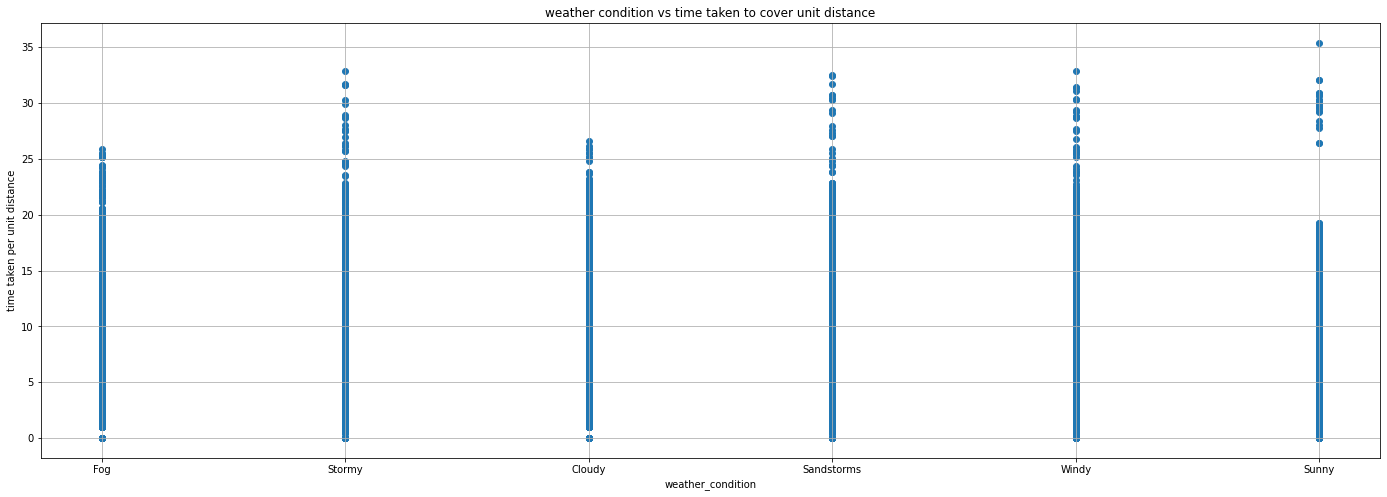

In [ ]:
plt.figure(figsize = (24,8))
# plt.scatter(df_train["Weather"].values, df_train["Time_taken"].values)
plt.scatter(temp, df_train["target"].values)
plt.xlabel("weather_condition")
# plt.xticks(['Fog', 'Stormy', 'Cloudy', 'Sandstorms', 'Windy', 'Sunny'])
plt.xticks(np.arange(6), ['Fog', 'Stormy', 'Cloudy', 'Sandstorms', 'Windy', 'Sunny'])
plt.ylabel("time taken per unit distance")
plt.title("weather condition vs time taken to cover unit distance")
plt.grid()
plt.show()

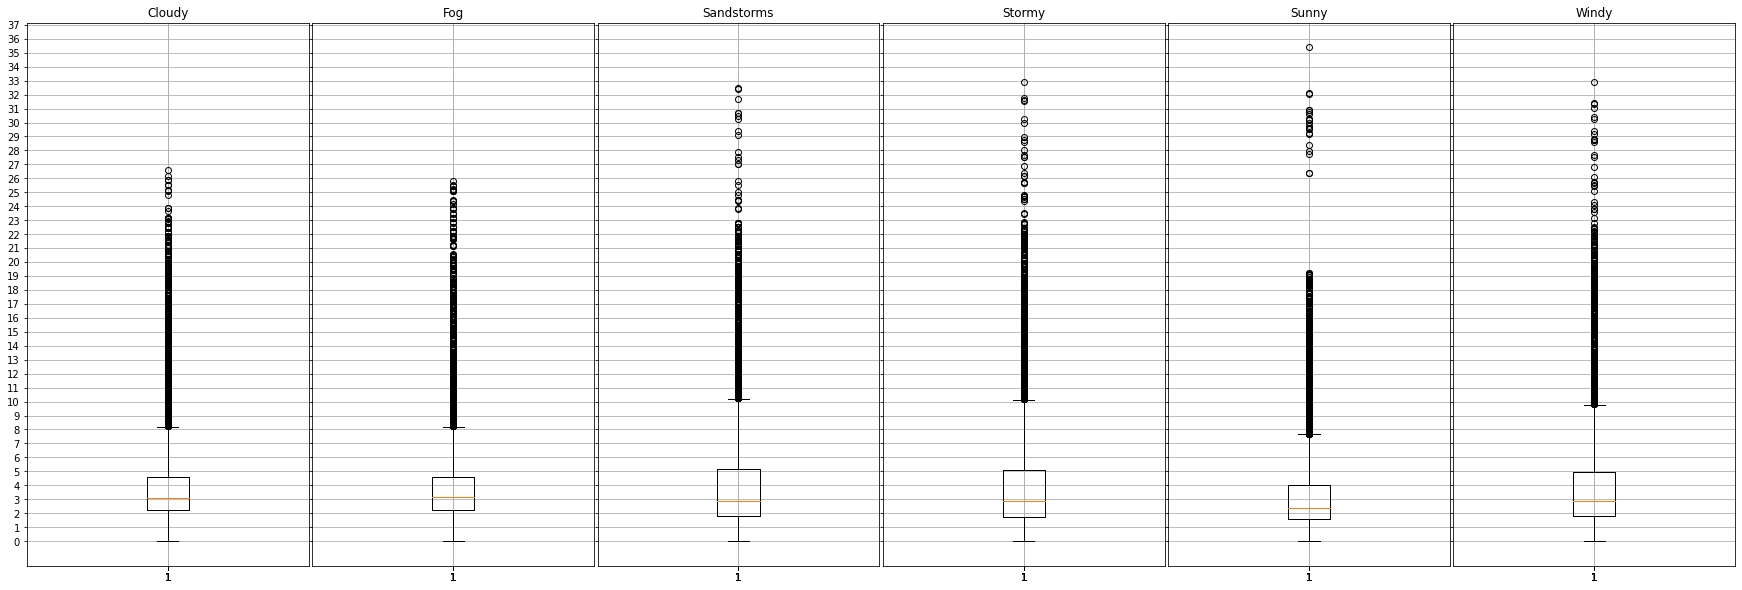

In [ ]:
fig, axe = plt.subplots(nrows = 1, ncols = 6, figsize = (24,8), sharex = True, sharey = True)
plt.yticks(np.arange(0,40, 1))
for i, (weather, group) in enumerate(df_train.groupby("Weather")):
    axe[i].boxplot(group["target"])
    axe[i].set_title(str(weather))
    axe[i].grid()
plt.tight_layout(pad = 0, h_pad = 0, w_pad = 0)
plt.show()

In [ ]:
# Disturbution of data is not even.
# The disturbution of target matches for (Cloudy, Fog), (Sandstorms, stormy, windy) & (Sunny)

In [ ]:
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance,target
0,0xaef3,BANGRES20DEL01,28.0,4.8,12.972161,77.596014,13.082161,77.706014,06-03-2022,17:10,...,Medium,1,Snack,scooter,0.0,No,Metropolitian,21.0,17.076725,1.229744
1,0x29f1,RANCHIRES12DEL02,39.0,4.8,0.000000,0.000000,0.080000,0.080000,12-03-2022,17:25,...,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,25.0,12.580268,1.987239
2,0x897a,MUMRES14DEL03,31.0,3.8,19.181300,72.836191,19.271300,72.926191,20-03-2022,19:25,...,Jam,2,Drinks,scooter,1.0,Yes,Metropolitian,42.0,13.763779,3.051488
3,0xb672,INDORES17DEL02,27.0,4.9,22.761226,75.887522,22.891226,76.017522,31-03-2022,23:60,...,Low,0,Buffet,motorcycle,1.0,No,Urban,18.0,19.658752,0.915623
4,0x3f0b,BANGRES18DEL01,23.0,4.8,12.913041,77.683237,13.023041,77.793237,31-03-2022,20:60,...,Jam,0,Meal,motorcycle,1.0,No,Metropolitian,44.0,17.078706,2.576308


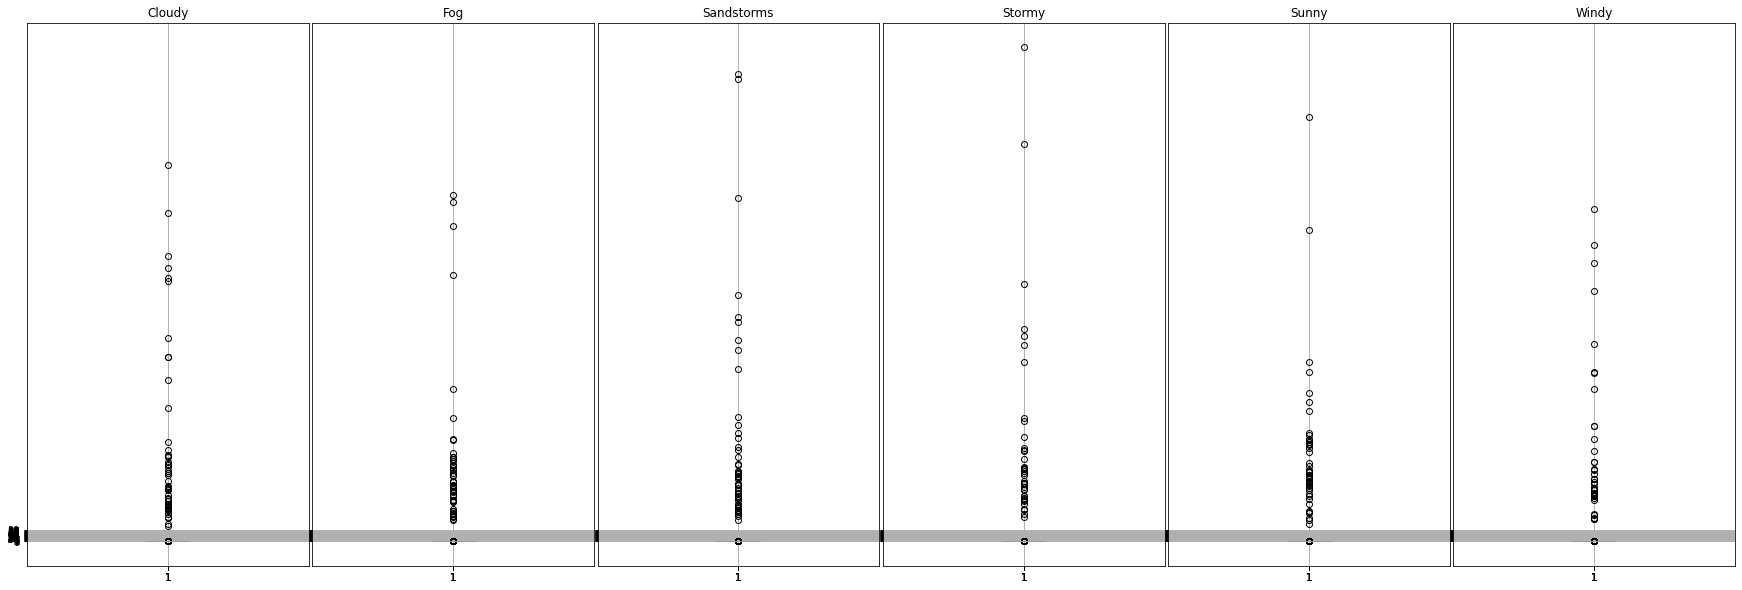

In [ ]:
fig, axe = plt.subplots(nrows = 1, ncols = 6, figsize = (24,8), sharex = True, sharey = True)
plt.yticks(np.arange(0,40, 1))
for i, (weather, group) in enumerate(df_train.groupby("Weather")):
    axe[i].boxplot(group["velocity"])
    axe[i].set_title(str(weather))
    axe[i].grid()
plt.tight_layout(pad = 0, h_pad = 0, w_pad = 0)
plt.show()

In [ ]:
df_train[df_train["Delivery_person_Ratings"]>5.0]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance
637,0xbffc,DEHRES18DEL02,50.0,6.0,-0.000000,-0.000000,0.020000,0.020000,13-02-2022,NaN,...,NaN,NaN,3,Snack,scooter,0.0,No,Metropolitian,25.0,3.145067
2520,0x493,HYDRES17DEL01,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,...,NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,27.0,17565.024412
2915,0x5e0,MUMRES07DEL03,50.0,6.0,-19.091458,72.827808,19.121458,72.857808,11-03-2022,NaN,...,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Urban,26.0,4249.083652
3159,0x706,VADRES09DEL02,50.0,6.0,0.000000,0.000000,0.050000,0.050000,11-03-2022,NaN,...,NaN,NaN,3,Drinks,scooter,0.0,No,Metropolitian,28.0,7.862668
3943,0x480,BANGRES15DEL01,50.0,6.0,-12.975377,-77.696664,13.015377,77.736664,01-03-2022,NaN,...,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,15.0,17354.406517
4326,0x3e9,MYSRES04DEL03,50.0,6.0,-12.308500,-76.665808,12.398500,76.755808,12-03-2022,NaN,...,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,40.0,17129.325998
4367,0xa24,RANCHIRES14DEL03,50.0,6.0,0.000000,0.000000,0.030000,0.030000,21-03-2022,NaN,...,NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,39.0,4.717601
4893,0x430,BANGRES19DEL01,50.0,6.0,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,...,NaN,NaN,3,Meal,electric_scooter,1.0,No,Metropolitian,18.0,17.078665
5618,0xc363,BHPRES08DEL03,50.0,6.0,23.232537,77.429845,23.322537,77.519845,18-02-2022,NaN,...,NaN,NaN,3,Buffet,scooter,1.0,No,Metropolitian,17.0,13.589007
5964,0xbef1,AGRRES13DEL02,50.0,6.0,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,...,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20.0,17658.249697


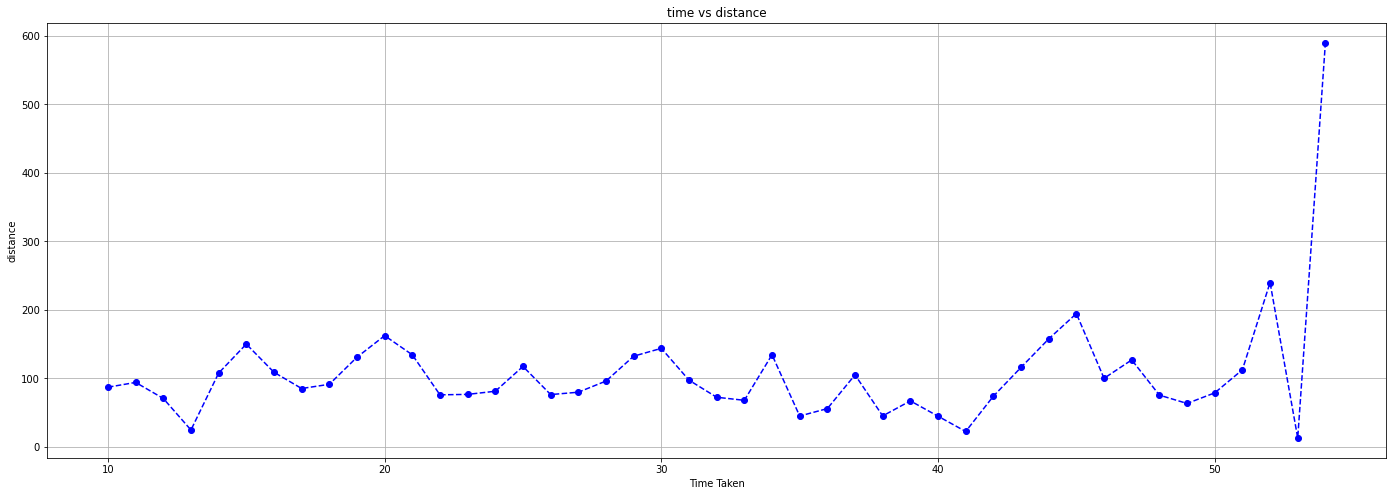

In [ ]:
distance_time = df_train[["distance", "Time_taken"]].sort_values(by = "Time_taken")
distance_time = df_train[["distance", "Time_taken"]].groupby("Time_taken").aggregate("mean")
plt.figure(figsize = (24,8))
plt.plot(distance_time.index, distance_time.values, "bo--")
plt.xlabel("Time Taken")
plt.ylabel("distance")
plt.title("time vs distance")
plt.grid()
plt.show()

In [ ]:
# "Monday" = 0, "Tuesday" = 1, ..........,  "Sunday" = 6

In [ ]:
df_train["week_day"] = pd.to_datetime(df_train["Order_Date"]).dt.day_of_week
df_train["month"] = pd.to_datetime(df_train["Order_Date"]).dt.month

In [ ]:
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance,target,velocity,week_day,month
0,0x43f7,COIMBRES20DEL02,24.0,4.9,10.994136,76.963303,11.124136,77.093303,29-03-2022,21:45,...,scooter,1.0,No,Metropolitian,20.0,20.254010,0.987459,1.012701,1,3
1,0x5e38,HYDRES04DEL03,27.0,4.9,17.411028,78.329645,17.501028,78.419645,06-04-2022,21:35,...,motorcycle,1.0,No,Urban,38.0,13.830756,2.747500,0.363967,5,6
2,0x9039,JAPRES18DEL01,37.0,4.3,26.913987,75.752891,26.953987,75.792891,26-03-2022,15:10,...,motorcycle,1.0,No,Urban,33.0,5.958760,5.538065,0.180568,5,3
3,0xd3cb,KOLRES19DEL02,27.0,4.9,22.549100,88.400467,22.569100,88.420467,13-02-2022,11:50,...,motorcycle,1.0,No,Metropolitian,21.0,3.027136,6.937250,0.144149,6,2
4,0x9117,HYDRES12DEL03,29.0,4.5,17.429585,78.392621,17.489585,78.452621,17-03-2022,18:25,...,motorcycle,0.0,No,Metropolitian,12.0,9.220419,1.301459,0.768368,3,3


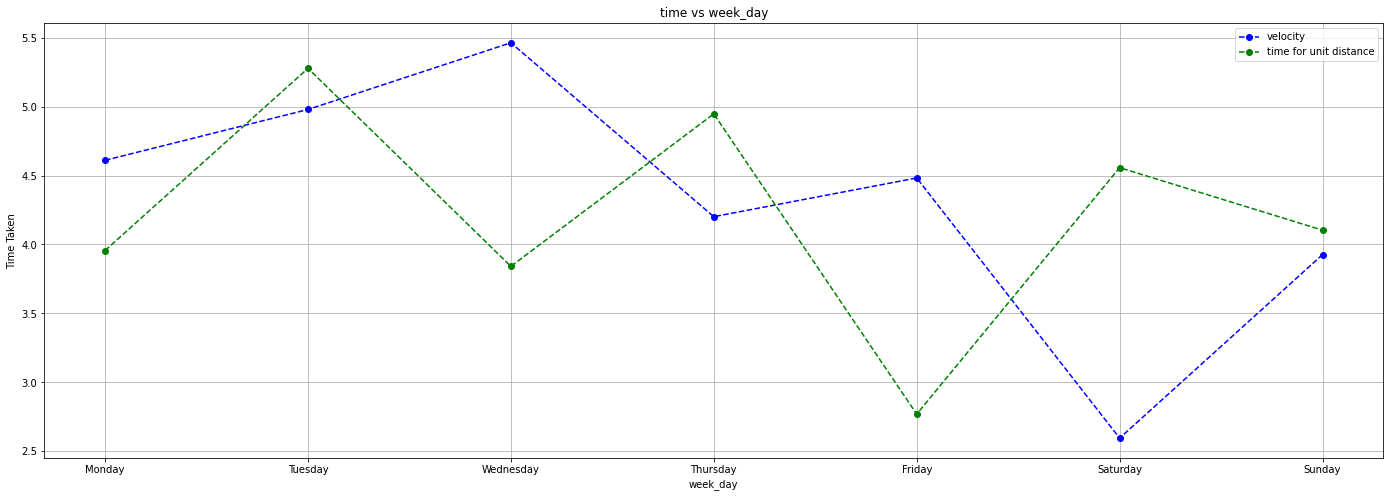

In [ ]:
week_day_time = df_train[["week_day", "velocity", "target"]].sort_values(by = "velocity")
week_day_time = df_train[["week_day", "velocity", "target"]].groupby("week_day").aggregate("mean")
plt.figure(figsize = (24,8))
plt.plot(week_day_time.index, week_day_time["velocity"], "bo--", label = "velocity")
plt.plot(week_day_time.index, week_day_time["target"], "go--", label = "time for unit distance")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("week_day")
plt.ylabel("Time Taken")
# plt.title("time vs week_day")
plt.legend()
plt.grid()
plt.show()

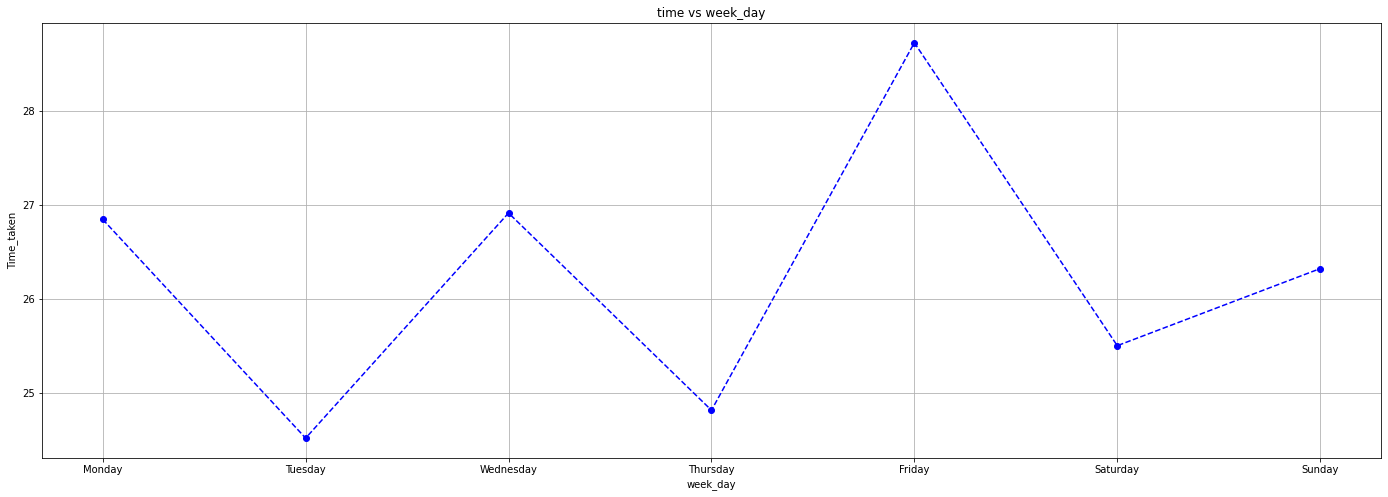

In [ ]:
week_day_time = df_train[["week_day", "Time_taken"]].sort_values(by = "Time_taken")
week_day_time = df_train[["week_day", "Time_taken"]].groupby("week_day").aggregate("mean")
plt.figure(figsize = (24,8))
# plt.plot(week_day_time.index, week_day_time["Time_taken"], "bo--")
plt.plot(week_day_time.index, week_day_time.values, "bo--")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("week_day")
plt.ylabel("Time_taken")
plt.title("time vs week_day")
plt.grid()
plt.show()

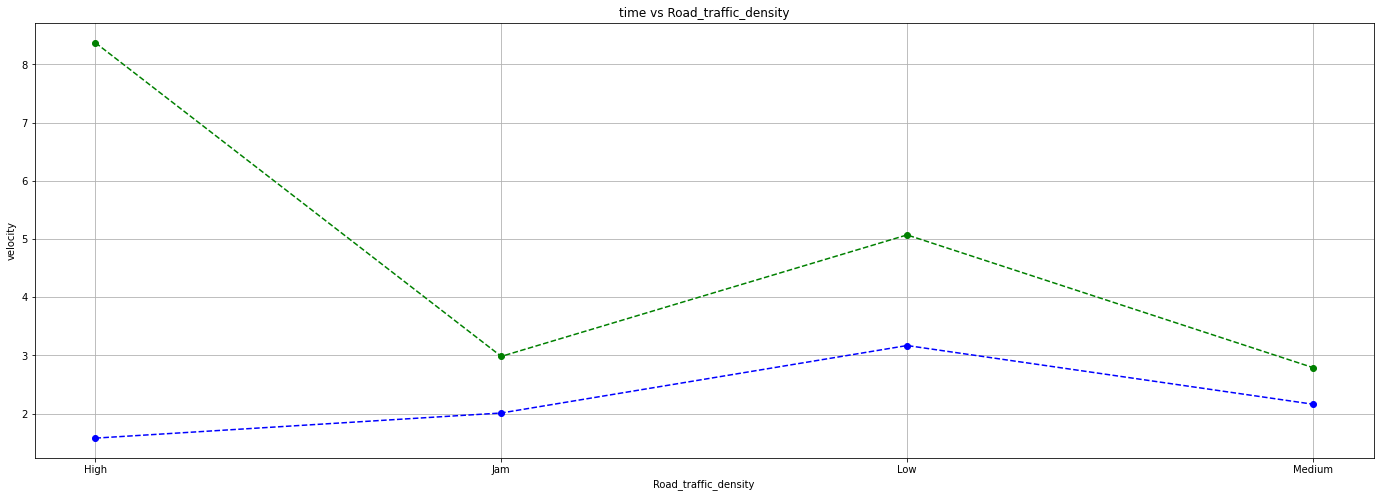

In [ ]:
Road_traffic_density_time = df_train[["Road_traffic_density", "velocity", "target"]].sort_values(by = "velocity")
Road_traffic_density_time = df_train[["Road_traffic_density", "velocity", "target"]].groupby("Road_traffic_density").aggregate("mean")
plt.figure(figsize = (24,8))
plt.plot(Road_traffic_density_time.index, Road_traffic_density_time["velocity"], "bo--", label = "velocity")
plt.plot(Road_traffic_density_time.index, Road_traffic_density_time["target"], "go--", label = "time per unit distance")
# plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Road_traffic_density")
plt.ylabel("velocity")
plt.title("time vs Road_traffic_density")
plt.grid()
plt.show()

In [ ]:
time_order = df_train["Time_Orderd"]
time_picked = df_train["Time_Order_picked"]
time_picked

0        21:50
1        21:40
2        15:15
3        11:60
4        18:40
         ...  
45588    22:40
45589    13:60
45590    13:45
45591    14:55
45592    20:25
Name: Time_Order_picked, Length: 45593, dtype: object

In [ ]:
def time_to_num(x):
    try:
        time = x.split(":")
        hr = time[0]
        min = time[1]
        time = int(hr) + int(min)/60
        return np.round(time, decimals=1)
    except:
        pass

In [ ]:
df_train["Time_Orderd"] = df_train["Time_Orderd"].map(lambda x : time_to_num(x))

In [ ]:
df_train["Time_Order_picked"] = df_train["Time_Order_picked"].map(lambda x : time_to_num(x))

In [ ]:
df_train["ready_time"] = df_train["Time_Order_picked"] - df_train["Time_Orderd"]

In [ ]:
mean_ratings = []
for id, group in df_train.groupby("Delivery_person_ID"):
    mean = group["Delivery_person_Ratings"].mean()
    mean_rating = [mean for _ in range(group.shape[0])]
    mean_ratings += mean_rating

In [ ]:
mean_ratings = np.round(mean_ratings, decimals = 0)

In [ ]:
rating_nan = df_train["Delivery_person_Ratings"].isna()

In [ ]:
df_train["Delivery_person_Ratings"] = df_train["Delivery_person_Ratings"].fillna(0) + rating_nan*mean_ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


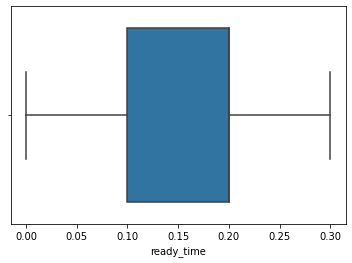

In [ ]:
sns.boxplot(df_train["ready_time"])

In [ ]:
order_nan = df_train["Time_Orderd"].isna()
temp_order_time = (df_train["Time_Order_picked"] - mean_ratings)*order_nan
df_train["Time_Orderd"] = df_train["Time_Orderd"].fillna(0) + temp_order_time

In [ ]:
df_train["ready_time"] = df_train["Time_Order_picked"] - df_train["Time_Orderd"]

In [ ]:
df_train.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather                         616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken                        0
distance                          0
target                            0
velocity                          0
week_day                          0
month                             0
ready_time                        0
dtype: int64

In [ ]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'distance',
       'target', 'velocity', 'week_day', 'month', 'ready_time'],
      dtype='object')

In [ ]:
df = df_train[['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd', 'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'distance', 'velocity', 
       'week_day', 'month', 'ready_time', 'Time_taken']]

In [ ]:
# df['City'].value_counts()
# df["Road_traffic_density"]
df_train['multiple_deliveries'].mean()

0.7446636771300449

In [ ]:
df['Delivery_person_Age'] = df["Delivery_person_Age"].fillna(30)
df['Weather'] = df["Weather"].fillna("Sunny")
df['Road_traffic_density'] = df['Road_traffic_density'].fillna("Medium")
df["multiple_deliveries"] = df["multiple_deliveries"].fillna(1)
df['Festival'] = df['Festival'].fillna('No')
df["City"] = df["City"].fillna("Metropolitian")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df.isna().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Time_Order_picked          0
Weather                    0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
distance                   0
velocity                   0
week_day                   0
month                      0
ready_time                 0
Time_taken                 0
dtype: int64

In [ ]:
df_weather = pd.get_dummies(df['Weather'], drop_first = True)
df_traffic = pd.get_dummies(df['Road_traffic_density'], drop_first = True)
df_vehicle = pd.get_dummies(df['Type_of_vehicle'], drop_first = True)
df_Festival = pd.get_dummies(df['Festival'], drop_first = True)
df_City = pd.get_dummies(df['City'], drop_first = True)
df_order = pd.get_dummies(df['Type_of_order'], drop_first = True)

In [ ]:
df = df.drop(["Weather", "Road_traffic_density", "Type_of_vehicle", "Festival", "City", "Type_of_order", "velocity"], axis = 1)
df = pd.concat([df, df_weather, df_traffic, df_vehicle, df_Festival, df_City, df_order], axis = 1)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,distance,velocity,week_day,month,...,Medium,electric_scooter,motorcycle,scooter,Yes,Semi-Urban,Urban,Drinks,Meal,Snack
0,24.0,4.9,21.8,21.8,2,1.0,20.254010,1.012701,1,3,...,0,0,0,1,0,0,0,0,0,1
1,27.0,4.9,21.6,21.7,0,1.0,13.830756,0.363967,5,6,...,0,0,1,0,0,0,1,0,1,0
2,37.0,4.3,15.2,15.2,0,1.0,5.958760,0.180568,5,3,...,1,0,1,0,0,0,1,0,1,0
3,27.0,4.9,11.8,12.0,1,1.0,3.027136,0.144149,6,2,...,0,0,1,0,0,0,0,0,0,1
4,29.0,4.5,18.4,18.7,1,0.0,9.220419,0.768368,3,3,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
x = df.drop("Time_taken", axis = 1)
y = df["Time_taken"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (41033, 27)
x_test (4560, 27)
y_train (41033,)
y_test (4560,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [ ]:
def train_and_predict(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_0 = model.predict(x_train)
    y_pred = model.predict(x_test)
    train_mse = mean_squared_error(y_train, y_pred_0)
    test_mse = mean_squared_error(y_test, y_pred)
    train_r2 = r2_score(y_train, y_pred_0)
    test_r2 = r2_score(y_test, y_pred)
    print("train_mse: ", train_mse)
    print("test_mse: ", test_mse)
    print("train_r2: ", train_r2)
    print("test_r2: ", test_r2)
    return model, y_pred

In [ ]:
linear = LinearRegression()
rf = RandomForestRegressor(n_estimators = 100)

In [ ]:
model, y_pred = train_and_predict(linear, x_train, x_test, y_train, y_test)

train_mse:  39.159595904561996
test_mse:  38.74384119908846
train_r2:  0.5543294707300634
test_r2:  0.5682574448066297


In [ ]:
model, y_pred = train_and_predict(rf, x_train, x_test, y_train, y_test)

train_mse:  2.2548052884263883
test_mse:  16.32260037280702
train_r2:  0.9743383392223266
test_r2:  0.8181088664868428


In [ ]:
df_test["week_day"] = pd.to_datetime(df_test["Order_Date"]).dt.day_of_week
df_test["month"] = pd.to_datetime(df_test["Order_Date"]).dt.month
df_test["Time_Orderd"] = df_test["Time_Orderd"].map(lambda x : time_to_num(x))
df_test["Time_Order_picked"] = df_test["Time_Order_picked"].map(lambda x : time_to_num(x))
df_test["ready_time"] = df_test["Time_Order_picked"] - df_test["Time_Orderd"]

mean_ratings = []
for id, group in df_test.groupby("Delivery_person_ID"):
    mean = group["Delivery_person_Ratings"].mean()
    mean_rating = [mean for _ in range(group.shape[0])]
    mean_ratings += mean_rating
mean_ratings = np.round(mean_ratings, decimals = 0)
rating_nan = df_test["Delivery_person_Ratings"].isna()
df_test["Delivery_person_Ratings"] = df_test["Delivery_person_Ratings"].fillna(0) + rating_nan*mean_ratings


order_nan = df_test["Time_Orderd"].isna()
temp_order_time = (df_test["Time_Order_picked"] - mean_ratings)*order_nan
df_test["Time_Orderd"] = df_test["Time_Orderd"].fillna(0) + temp_order_time
df_test["ready_time"] = df_test["Time_Order_picked"] - df_test["Time_Orderd"]

df_test = df_test[['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd', 'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'distance', 'week_day', 'month', 'ready_time']]

In [ ]:
df_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance,week_day,month,ready_time
0,37.0,4.5,22.2,22.3,Sandstorms,Low,2,Buffet,scooter,1.0,No,Metropolitian,20.253089,4,3,0.1
1,25.0,4.7,11.2,11.3,Windy,High,0,Snack,motorcycle,NaN,Yes,Metropolitian,1.529988,3,3,0.1
2,20.0,4.8,22.5,22.6,Fog,Low,0,Drinks,motorcycle,1.0,No,NaN,10.709309,3,3,0.1
3,35.0,4.6,22.9,23.2,Stormy,Low,1,Buffet,scooter,0.0,No,Metropolitian,12.464528,6,3,0.3
4,38.0,4.9,23.0,23.2,Cloudy,Low,1,Meal,scooter,0.0,No,Metropolitian,4.537602,3,3,0.2


In [ ]:
df_test['Delivery_person_Age'] = df_test["Delivery_person_Age"].fillna(30)
df_test['Weather'] = df_test["Weather"].fillna("Sunny")
df_test['Road_traffic_density'] = df_test['Road_traffic_density'].fillna("Medium")
df_test["multiple_deliveries"] = df_test["multiple_deliveries"].fillna(1)
df_test['Festival'] = df_test['Festival'].fillna('No')
df_test["City"] = df_test["City"].fillna("Metropolitian")

df_test_weather = pd.get_dummies(df_test['Weather'], drop_first = True)
df_test_traffic = pd.get_dummies(df_test['Road_traffic_density'], drop_first = True)
df_test_vehicle = pd.get_dummies(df_test['Type_of_vehicle'], drop_first = True)
df_test_Festival = pd.get_dummies(df_test['Festival'], drop_first = True)
df_test_City = pd.get_dummies(df_test['City'], drop_first = True)
df_test_order = pd.get_dummies(df_test['Type_of_order'], drop_first = True)
df_test["Delivery_person_Ratings"] = df_test["Delivery_person_Ratings"].fillna(4.6)
df_test["Time_Orderd"] = df_test["Time_Orderd"].fillna(18.0)


df_test["ready_time"] = df_test["Time_Order_picked"] - df_test["Time_Orderd"]

df_test = df_test.drop(["Weather", "Road_traffic_density", "Type_of_vehicle", "Festival", "City", "Type_of_order"], axis = 1)
df_test = pd.concat([df_test, df_test_weather, df_test_traffic, df_test_vehicle, df_test_Festival, df_test_City, df_test_order], axis = 1)
df_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,distance,week_day,month,ready_time,...,Medium,electric_scooter,motorcycle,scooter,Yes,Semi-Urban,Urban,Drinks,Meal,Snack
0,37.0,4.5,22.2,22.3,2,1.0,20.253089,4,3,0.1,...,0,0,0,1,0,0,0,0,0,0
1,25.0,4.7,11.2,11.3,0,1.0,1.529988,3,3,0.1,...,0,0,1,0,1,0,0,0,0,1
2,20.0,4.8,22.5,22.6,0,1.0,10.709309,3,3,0.1,...,0,0,1,0,0,0,0,1,0,0
3,35.0,4.6,22.9,23.2,1,0.0,12.464528,6,3,0.3,...,0,0,0,1,0,0,0,0,0,0
4,38.0,4.9,23.0,23.2,1,0.0,4.537602,3,3,0.2,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_test.isna().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Time_Order_picked          0
Vehicle_condition          0
multiple_deliveries        0
distance                   0
week_day                   0
month                      0
ready_time                 0
Fog                        0
Sandstorms                 0
Stormy                     0
Sunny                      0
Windy                      0
Jam                        0
Low                        0
Medium                     0
electric_scooter           0
motorcycle                 0
scooter                    0
Yes                        0
Semi-Urban                 0
Urban                      0
Drinks                     0
Meal                       0
Snack                      0
dtype: int64

In [ ]:
df_test.shape, x.shape

((11399, 27), (45593, 28))

In [ ]:
x.columns, df_test.columns

(Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd',
        'Time_Order_picked', 'Vehicle_condition', 'multiple_deliveries',
        'distance', 'velocity', 'week_day', 'month', 'ready_time', 'Fog',
        'Sandstorms', 'Stormy', 'Sunny', 'Windy', 'Jam', 'Low', 'Medium',
        'electric_scooter', 'motorcycle', 'scooter', 'Yes', 'Semi-Urban',
        'Urban', 'Drinks', 'Meal', 'Snack'],
       dtype='object'),
 Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd',
        'Time_Order_picked', 'Vehicle_condition', 'multiple_deliveries',
        'distance', 'week_day', 'month', 'ready_time', 'Fog', 'Sandstorms',
        'Stormy', 'Sunny', 'Windy', 'Jam', 'Low', 'Medium', 'electric_scooter',
        'motorcycle', 'scooter', 'Yes', 'Semi-Urban', 'Urban', 'Drinks', 'Meal',
        'Snack'],
       dtype='object'))

In [ ]:
pd.read_csv("/content/dataset/sample_submission.csv")

,ID,Time_taken (min)
0,0x7faf,25.0
1,0x4607,24.0
2,0xb379,33.0
3,0x7804,19.0
4,0x20f7,42.0


In [ ]:
y_pred = model.predict(df_test)

In [ ]:
sub = pd.read_csv("/content/dataset/test.csv", header = None).iloc[:,0]
sub.columns = ['ID']

In [ ]:
ID = sub.values

In [ ]:
sub = pd.DataFrame({"ID": ID, "Time_taken (min)": y_pred})

In [ ]:
sub.to_csv("prediction.csv")

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 22 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()
model, y_pred = train_and_predict(xgb, x_train, x_test, y_train, y_test)

train_mse:  12.401148316731371
test_mse:  15.92366074886596
train_r2:  0.8588640611271274
test_r2:  0.8225544559606156
